# African Credit Scoring Challenge


___

<a id="cont"></a>
_______________________________________________________________________________________________________________________________

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing packages</a>

<a href=#three>3. Loading the data</a>

<a href=#four>4.  Exploratory Data Analysis</a>

<a href=#five>5. Data Cleaning and Preprocessing</a>

<a href=#six>6.  Modeling</a>


<a href=#seven>7. Conclusion

<a id="one"></a>
# 1) Introduction
<a href=#cont>Back to Table of Contents</a>

___
Financial institutions need to predict loan defaults to mitigate risk and optimise lending decisions. In Africa’s rapidly growing financial markets, with diverse customer demographics and dynamic economic conditions, accurately assessing default risk is more important than ever.

In this project, we want to develop a robust, generalisable machine learning model to predict the likelihood of loan defaults for both existing customers and new applicants. Beyond accurate predictions, we are encouraged to innovate by incorporating unique factors relevant to each financial market.

The objective of this project is to develop a machine learning model that accurately predicts the probability of loan default.

 <a id="two"></a>
## 2. Importing Packages

Let’s get started with the task of credit scoring prediction by importing the necessary Python libraries

<a href=#cont>Back to Table of Contents</a>

In [20]:
!pip uninstall -y numpy
!pip install numpy==1.26.4  # Explicitly set a stable version
!pip install --no-cache-dir --force-reinstall catboost
!plotly_get_chrome
kaleido.get_chrome()

#!pip install --upgrade "numpy<2" pandas==2.2.2 scipy scikit-learn catboost
#!pip install catboost
!pip install kaleido
#!pip install pandas numpy matplotlib seaborn plotly scikit-learn lightgbm xgboost imblearn
#!pip install pandas numpy matplotlib seaborn plotly scikit-learn lightgbm xgboost imblearn

Found existing installation: numpy 2.3.1
Uninstalling numpy-2.3.1:
  Successfully uninstalled numpy-2.3.1
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
plotnine 0.14.6 requires scipy<1.16.0,>=1.8.0, but you have scipy 1.16.0 which is incompatible.
cudf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 157.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 139.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 226.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 239.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 148.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 202.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 169.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 177.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 158.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 183.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 221.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


NameError: name 'kaleido' is not defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'png'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score, r2_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>

In this section we will load the train and test csv files into DataFrames. We will be using Pandas python package to read the csv files from our local computer.

<a href=#cont>Back to Table of Contents</a>

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

df_train.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [3]:
df_train.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

In [4]:
df_test.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


In [5]:
df_test.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid'],
      dtype='object')

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>

In this section, we will perform an in-depth analysis of the features in the dataset. EDA will help us look at the data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the features.

<a href=#cont>Back to Table of Contents</a>

In [6]:
df_train.shape, df_test.shape

((68654, 16), (18594, 15))

In [7]:
print('Train Rows    :', df_train.shape[0])
print('Train Columns :', df_train.shape[1])

print('\n')
print('Test Rows     :', df_test.shape[0])
print('Test Columns  :', df_test.shape[1])


Train Rows    : 68654
Train Columns : 16


Test Rows     : 18594
Test Columns  : 15


Looking at the shape of the train and test datasets , we can see that the train data has 68,654 rows whereas the test data has 18,594 rows. We also see that the train data has 16 columns and the test data has one column less. Now, let's take a look at the data types in both data sets using `pd.info()` to get more information about them.

In [8]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

(None, None)

In [9]:
print('Train Variables:')
obj = (df_train.dtypes == 'object')
object_cols = list(obj[obj].index)
print( "Categorical Variables:", len(object_cols))

int = (df_train.dtypes == 'int64')
num_cols = list(int[int].index)
print( "Integer Variables:", len(num_cols))

float = (df_train.dtypes == 'float64')
float_cols = list(float[float].index)
print( "Float Variables:", len(float_cols))

print('\n')
print('Test Variables:')
obj = (df_test.dtypes == 'object')
object_cols = list(obj[obj].index)
print( "Categorical Variables:", len(object_cols))

int = (df_test.dtypes == 'int64')
num_cols = list(int[int].index)
print( "Integer Variables:", len(num_cols))

float = (df_test.dtypes == 'float64')
float_cols = list(float[float].index)
print( "Float Variables:", len(float_cols))

Train Variables:
Categorical Variables: 6
Integer Variables: 5
Float Variables: 5


Test Variables:
Categorical Variables: 6
Integer Variables: 4
Float Variables: 5


As we can see our test dataset has six categorical variables, five integer variables and five float variables. While our test dataset has six categorical variables, four integer variables and five float variables. It also looks like that the features in our datasets have no missing values, but we still have to check that just to be sure.

Next, we need to identify if our dataset has columns that contain a single value. The reason for that is because columns that have a single value are not useful when building a model. These columns or features are referred to as zero-variance features or predictors because if we measured their variance (i.e., how much individual data points differ from the mean of the dataset), it would be zero.

In [10]:
print("\nUnique values : \n", df_train.nunique())


Unique values : 
 ID                             68654
customer_id                     6540
country_id                         1
tbl_loan_id                    66520
lender_id                          4
loan_type                         22
Total_Amount                   19076
Total_Amount_to_Repay          21920
disbursement_date                768
due_date                         893
duration                          64
New_versus_Repeat                  2
Amount_Funded_By_Lender        23391
Lender_portion_Funded          12844
Lender_portion_to_be_repaid     9791
target                             2
dtype: int64


In [11]:
zero_variance_cols = [col for col in df_train.columns if df_train[col].nunique() == 1]
print("Zero Variance Columns:", zero_variance_cols)

Zero Variance Columns: ['country_id']


We can see that our dataset has one zero-variance predictor , which is the **`country_id`** column. But there are columns that have very few values like the column called **`New_versus_Repeat`** which has only two unique values, this makes sense since this column is categorical.

Next, we will look at the descriptive statistics for the numerical columns.

In [12]:
def describe_num(df, stats):
    d = df.describe(include=[np.number])
    return pd.concat([d, df.reindex(columns=d.columns).agg(stats)])

describe_num(df_train, ['skew', 'sum', 'kurt'])

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,6.865400e+04,6.865400e+04,6.865400e+04,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,2.543903e+05,2.630563e+05,2.664205e+05,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,2.664272e+04,3.948666e+04,3.590999e+03,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,1.450000e+02,1.013230e+05,2.456840e+05,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.489458e+05,2.339422e+05,2.672780e+05,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,2.553610e+05,2.603055e+05,2.672780e+05,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,2.622692e+05,2.869628e+05,2.672780e+05,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,3.127370e+05,3.753200e+05,2.672780e+05,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000
skew,-5.434989e+00,3.697022e-01,-3.993717e+00,1.038275e+02,1.045788e+02,34.058866,6.106367e+01,-0.211887,6.319776e+01,7.182955
sum,1.746491e+10,1.805986e+10,1.829083e+10,1.018608e+09,1.073744e+09,586620.000000,1.747700e+08,15013.180831,1.821131e+08,1258.000000


In [13]:
df_train.describe(include=['object'])

,ID,country_id,loan_type,disbursement_date,due_date,New_versus_Repeat
count,68654,68654,68654,68654,68654,68654
unique,68654,1,22,768,893,2
top,ID_266671248032267278,Kenya,Type_1,2022-07-16,2022-07-23,Repeat Loan
freq,1,68654,61723,938,940,68087


Looking at the descriptive statistics of the numerical variables, we can see the skewness of the features. We can see that most of the features are positively skewed, with an exception of a single feature. Let's also have a look at the kurtosis of these features. We know that **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers. Most of our numerical features have high kurtosis, with the exception of the feature **`Lender_portion_Funded`**.

Now, let's see if our dataset has any missing values.

In [14]:
# Checking if the data contains any null values
df_train.isnull().sum().sort_values(ascending=False) / df_train.shape[0] * 100

,0
ID,0.0
customer_id,0.0
country_id,0.0
tbl_loan_id,0.0
lender_id,0.0
loan_type,0.0
Total_Amount,0.0
Total_Amount_to_Repay,0.0
disbursement_date,0.0
due_date,0.0


In [15]:
# Checking if the data contains any null values
df_test.isnull().sum().sort_values(ascending=False) / df_test.shape[0] * 100

,0
ID,0.0
customer_id,0.0
country_id,0.0
tbl_loan_id,0.0
lender_id,0.0
loan_type,0.0
Total_Amount,0.0
Total_Amount_to_Repay,0.0
disbursement_date,0.0
due_date,0.0


Looking at the tables above, we can see that both of the train and test datasets have no missing values. Now, lets check if our dataset has any duplicates.

In [16]:
duplicate_train = df_train[df_train.duplicated()]
duplicate_test = df_test[df_test.duplicated()]

print("Duplicate train Rows :", duplicate_train)
print('\n')
print("Duplicate test Rows  :", duplicate_test)

Duplicate train Rows : Empty DataFrame
Columns: [ID, customer_id, country_id, tbl_loan_id, lender_id, loan_type, Total_Amount, Total_Amount_to_Repay, disbursement_date, due_date, duration, New_versus_Repeat, Amount_Funded_By_Lender, Lender_portion_Funded, Lender_portion_to_be_repaid, target]
Index: []


Duplicate test Rows  : Empty DataFrame
Columns: [ID, customer_id, country_id, tbl_loan_id, lender_id, loan_type, Total_Amount, Total_Amount_to_Repay, disbursement_date, due_date, duration, New_versus_Repeat, Amount_Funded_By_Lender, Lender_portion_Funded, Lender_portion_to_be_repaid]
Index: []


Looks like our datasets have no duplicates. Next, we can have a look at our columns to see if they have special symbols in them.

In [17]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_train.columns:
    print('{} : {}'.format(col,df_train[col].unique()))

ID : ['ID_266671248032267278' 'ID_248919228515267278' 'ID_308486370501251804'
 ... 'ID_259137216701267278' 'ID_266801303201267278'
 'ID_249117268933267278']
customer_id : [266671 248919 308486 ... 247003 272221 248427]
country_id : ['Kenya']
tbl_loan_id : [248032 228515 370501 ... 216701 303201 268933]
lender_id : [267278 251804 245684 267277]
loan_type : ['Type_1' 'Type_7' 'Type_5' 'Type_4' 'Type_6' 'Type_14' 'Type_9' 'Type_10'
 'Type_19' 'Type_16' 'Type_2' 'Type_11' 'Type_23' 'Type_18' 'Type_17'
 'Type_12' 'Type_20' 'Type_13' 'Type_21' 'Type_15' 'Type_24' 'Type_22']
Total_Amount : [ 8448. 25895.  6900. ...  1843. 95898. 25096.]
Total_Amount_to_Repay : [ 8448. 25979.  7142. ... 96535. 25861. 13002.]
disbursement_date : ['2022-08-30' '2022-07-30' '2024-09-06' '2022-10-20' '2022-11-28'
 '2022-10-19' '2022-11-29' '2022-10-25' '2022-10-11' '2022-08-15'
 '2022-08-16' '2022-08-24' '2022-11-17' '2022-10-03' '2022-09-22'
 '2022-09-17' '2022-06-27' '2022-08-29' '2022-09-23' '2022-09-28'
 '2022

Looking at the columns, it seems like the columns have have no special symbols or characters. But I am not sure about the numeric columns since I can't see all their values. Now, lets have a look at the distribution of our target column.

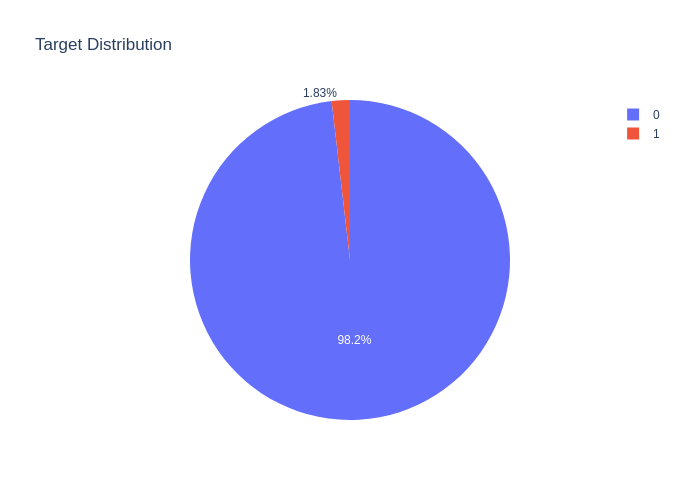

In [21]:
# Count the target values
target_count = df_train['target'].value_counts()

# Convert to a DataFrame
target_count_df = target_count.reset_index()
target_count_df.columns = ['Target', 'Count']  # Rename columns for clarity

# Create the pie chart
fig_target = px.pie(
    target_count_df,
    names='Target',
    values='Count',
    title='Target Distribution'
)

# Use a different renderer that doesn't require Chrome
fig_target.show() # Reverted to default show()

Looking at the above pie chart, we can see that the target column has an unequal number of 0/1. This means that the number between loan payments and loan defaults is imbalanced. This also tells us that a small amount of customers have defaulted on their loans. Next, we will look at the distribution of the loan type column.

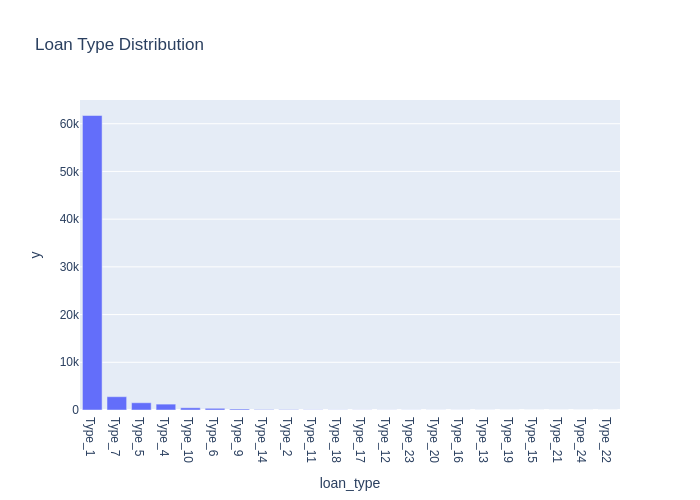

In [22]:
loan_type_count = df_train.loan_type.value_counts()
fig_loan_type = px.bar(loan_type_count,
                    x=loan_type_count.index,
                    y=loan_type_count.values,
                    title='Loan Type Distribution')
fig_loan_type.show()

In [23]:
def calculate_loan_type_percentages(df, column_name):
    loan_types = df[column_name].unique()  # Get unique loan types
    total_count = len(df)  # Total number of rows in the DataFrame

    # Collect percentages and loan types in a list
    percentages = [
        {
            "Loan Type": loan_type,
            "Percentage": round((len(df[df[column_name] == loan_type]) / total_count) * 100, 2)
        }
        for loan_type in loan_types
    ]

    # Sort by percentage in descending order
    percentages_sorted = sorted(percentages, key=lambda x: x["Percentage"], reverse=True)

    # Print the results
    for entry in percentages_sorted:
        print(f"{entry['Loan Type']}: {entry['Percentage']}%")

calculate_loan_type_percentages(df_train, 'loan_type')

Type_1: 89.9%
Type_7: 4.06%
Type_5: 2.22%
Type_4: 1.8%
Type_10: 0.68%
Type_6: 0.52%
Type_9: 0.3%
Type_14: 0.14%
Type_2: 0.11%
Type_11: 0.06%
Type_18: 0.04%
Type_23: 0.03%
Type_17: 0.03%
Type_12: 0.03%
Type_16: 0.02%
Type_20: 0.02%
Type_19: 0.01%
Type_13: 0.01%
Type_15: 0.01%
Type_21: 0.0%
Type_24: 0.0%
Type_22: 0.0%


Looking at the bar plot and the percentages above, we can see that most of the customers fall under loan type 1. Next, we will have a look at the distribution of the new versus repeat column

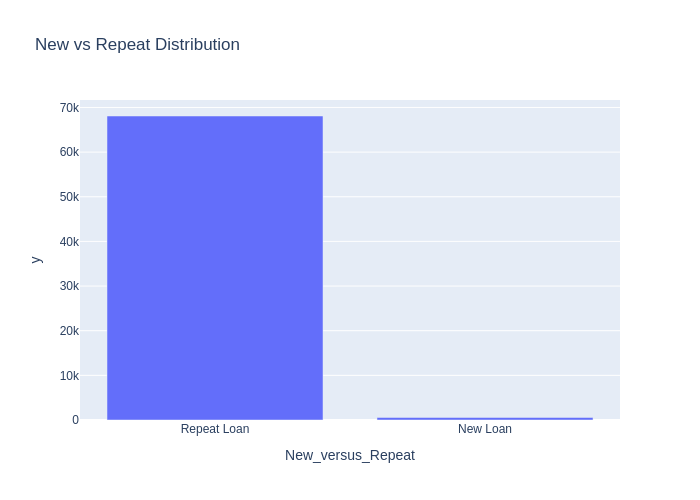

In [24]:
new_vs_repeat_count = df_train.New_versus_Repeat.value_counts()
fig_new = px.bar(new_vs_repeat_count,
                     x=new_vs_repeat_count.index,
                     y=new_vs_repeat_count.values,
                     title='New vs Repeat Distribution')
fig_new.show()

In [25]:
count_repeat = len(df_train[df_train.New_versus_Repeat == 'Repeat Loan'])
count_new = len(df_train[df_train.New_versus_Repeat == 'New Loan'])
print('Percentage of Repeat Loans :', round(count_repeat / len(df_train) * 100, 2))
print('Percentage of New Loans:', round(count_new / len(df_train) * 100, 2))

Percentage of Repeat Loans : 99.17
Percentage of New Loans: 0.83


The bar plot and the percentages above, shows us that the majority of the customers have taken loans before. Let's also have a look at the distribution of the numerical columns.

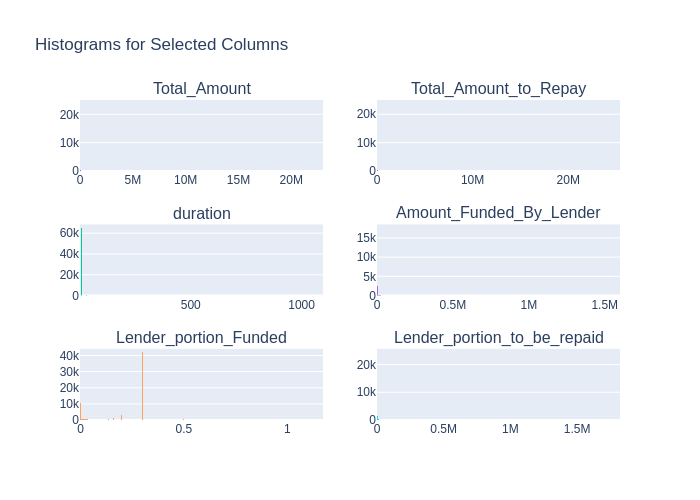

In [26]:
def plot_histograms_subplots(df, columns, rows, cols):
    # Create subplots
    fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=columns
    )

    # Add histograms to each subplot
    for i, column in enumerate(columns):
        row = i // cols + 1  # Calculate the row index
        col = i % cols + 1   # Calculate the column index

        fig.add_trace(
            go.Histogram(x=df[column], name=column),
            row=row,
            col=col
        )

    # Update layout
    fig.update_layout(
        height=500 * rows,  # Adjust height based on the number of rows
        width=700 * cols,   # Adjust width based on the number of columns
        title_text="Histograms for Selected Columns",
        showlegend=False
    )

    return fig


columns_to_plot = ['Total_Amount', 'Total_Amount_to_Repay', 'duration','Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid']
fig = plot_histograms_subplots(df_train, columns_to_plot, rows=3, cols=2)  # 3x2 grid
fig.show()

The histograms above confirms what are we already talked about before, where we said that most of our numerical features have high kurtosis (i.e positively skewd), with the exception of the feature **`Lender_portion_Funded`**. Next, lets look at the correlation of the numerical features. Since, our dataset is not normally distributed  we will use the spearman's rank corrrelation instead of the pearson's correlation.

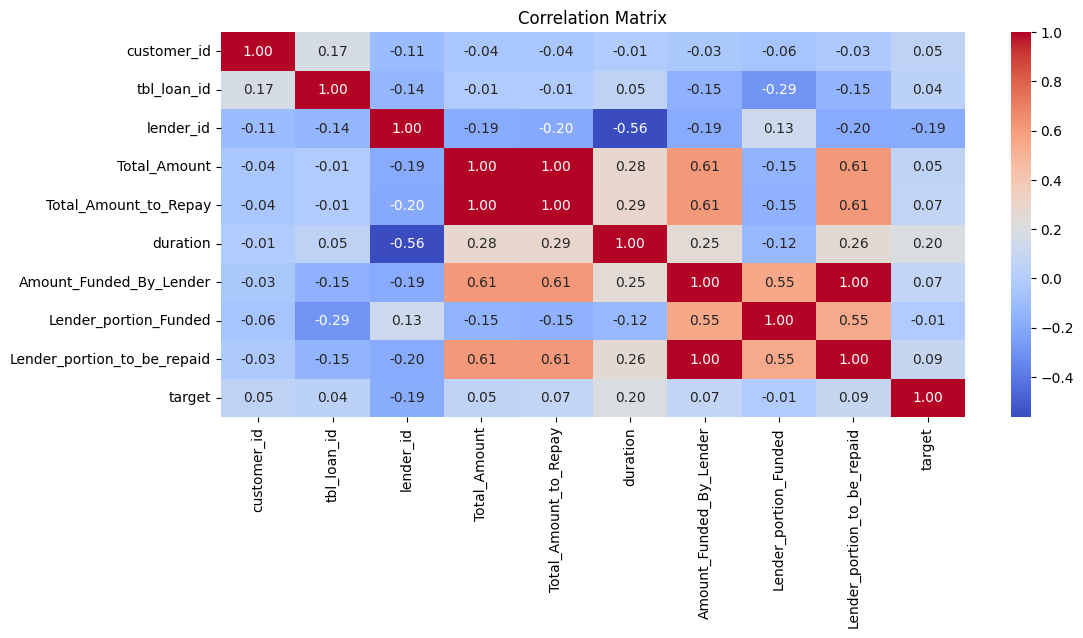

In [27]:
# Calculate the correlation matrix
correlation_matrix = df_train.select_dtypes(include=np.number).corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Looking at the correlation matrix above, we can see that the is a positive strong correlation between **`Lender_portion_to_be_repaid`** and **`Amount_Funded_By_Lender`**. Also, the columns **`Total_Amount_to_Repay`** and **`Total_Amount`** have a strong positive correlation. Now, let's have a look at the relationship between the income of the Total Amount and the target.

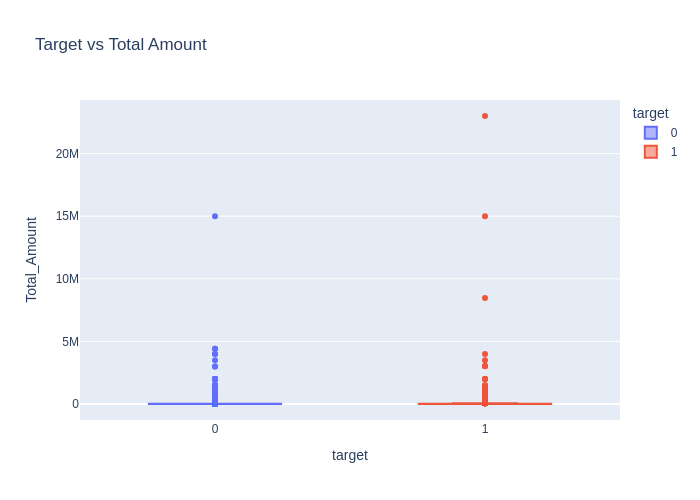

In [28]:
fig_total_amount = px.box(df_train, x='target',
                    y='Total_Amount',
                    color='target',
                    title='Target vs Total Amount ')

fig_total_amount.show()

Looking at the bar plot above, we can also see that the Total Amount column has outliers, which we will have to remove later. It may not be clear, but, we can see that a high total amount can result in a loan default. Next, we will have a look at the relationship between total amount to repay and the target.

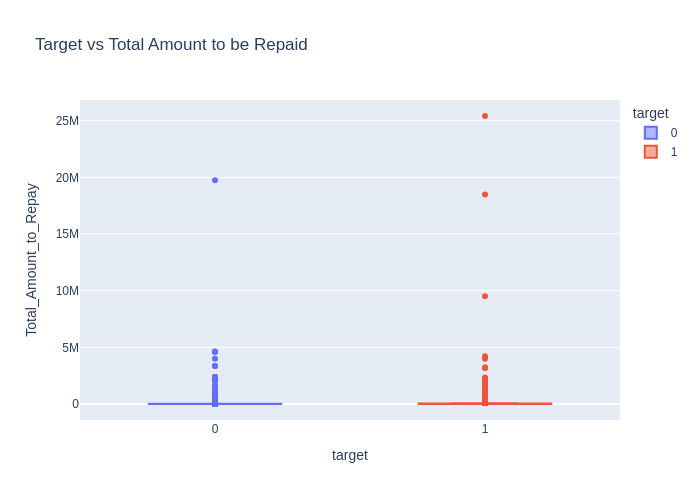

In [29]:
fig_total_amount_repay = px.box(df_train, x='target',
                    y='Total_Amount_to_Repay',
                    color='target',
                    title='Target vs Total Amount to be Repaid ')

fig_total_amount_repay.show()

Looking at the bar plot above, we can also see that the Total Amount to Repay column has outliers, which we will have to remove later. From this plot, we can also see that the higher the total amount to be repaid the more likely a customer to default on the loan. Next, we will have a look at the relationship between the duration of the loan and the target.

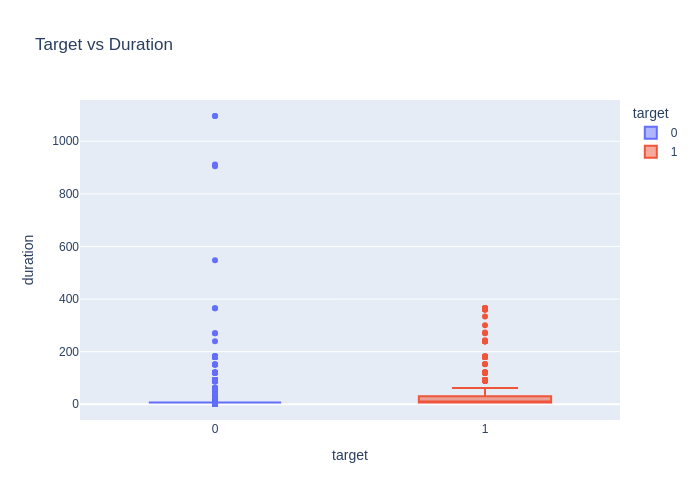

In [30]:
fig_duration = px.box(df_train, x='target',
                    y='duration',
                    color='target',
                    title='Target vs Duration')

fig_duration.show()

Looking at the bar plot above, we can also see that the duration column has outliers, which we will have to remove later. We also see that as the duration increases, a customer is more likely to default on their loan. Next, we will have a look at the relationship between the Amount Funded By Lender and the target.

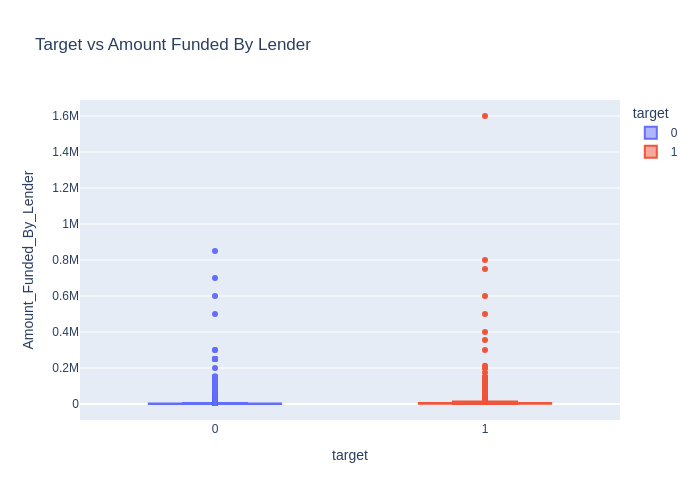

In [31]:
fig_lender_fund = px.box(df_train, x='target',
                    y='Amount_Funded_By_Lender',
                    color='target',
                    title='Target vs Amount Funded By Lender')

fig_lender_fund.show()

Looking at the bar plot above, we can also see that the Amount Funded By Lender column has outliers, which we will have to remove later. But more importantly, it appears as if the amount funded by a lender is high, the customer is more likely to default from a loan.Next, we will have a look at the relationship between the Lender Portion Funded and target columns.

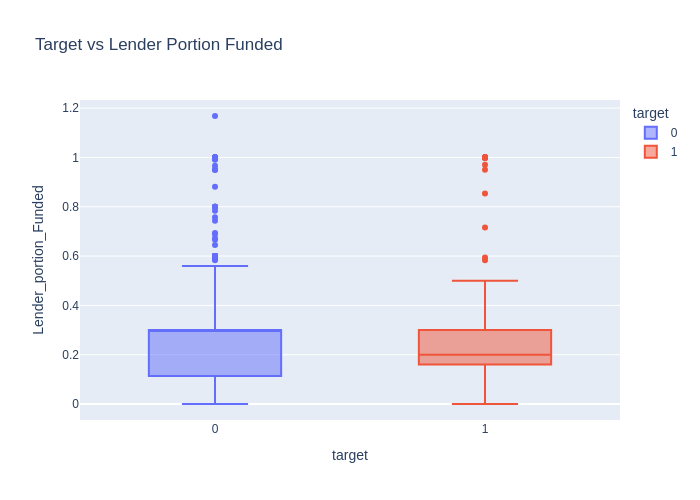

In [32]:
fig_lender_fund_portion = px.box(df_train, x='target',
                    y='Lender_portion_Funded',
                    color='target',
                    title='Target vs Lender Portion Funded')

fig_lender_fund_portion.show()

Looking at the bar plot above, we can also see that the Lender Portion Funded column also has outliers, which we will have to remove later. Next, we will have a look at the relationship between the Lender portion to be repaid and target columns.

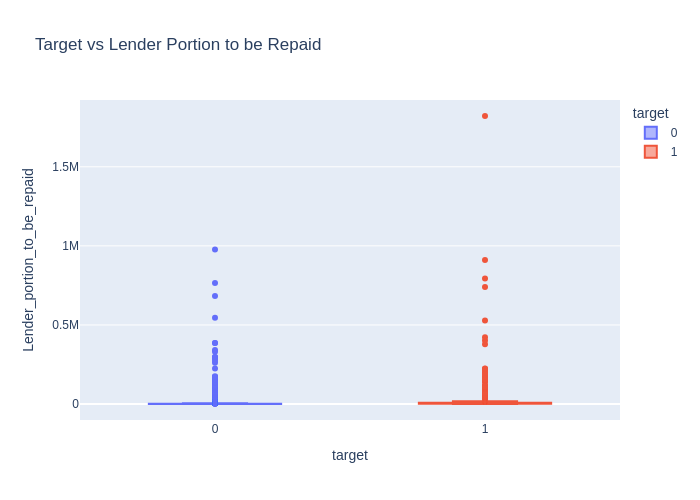

In [33]:
fig_lender_portion_repay = px.box(df_train, x='target',
                    y='Lender_portion_to_be_repaid',
                    color='target',
                    title='Target vs Lender Portion to be Repaid')

fig_lender_portion_repay.show()

It looks like all of our numerical variables have outliers. We can also see that, a customer is more likely to default on their loan if they have to pay a bigger portion to the lender. Next, we will have a look at the relationship between loan type and the target.

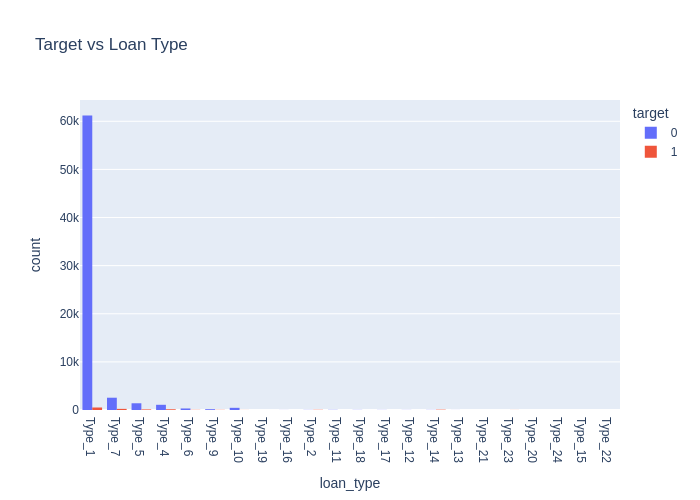

In [34]:
fig_loan = px.histogram(df_train, x='loan_type',
                                  color='target',
                                  barmode='group',
                                  title='Target vs Loan Type')

fig_loan.show()

From the above bar graph, we can see that customers with loan type 1 are less likely to default on their loans. Next, we will look at the relationship between new versus repeat and the target.

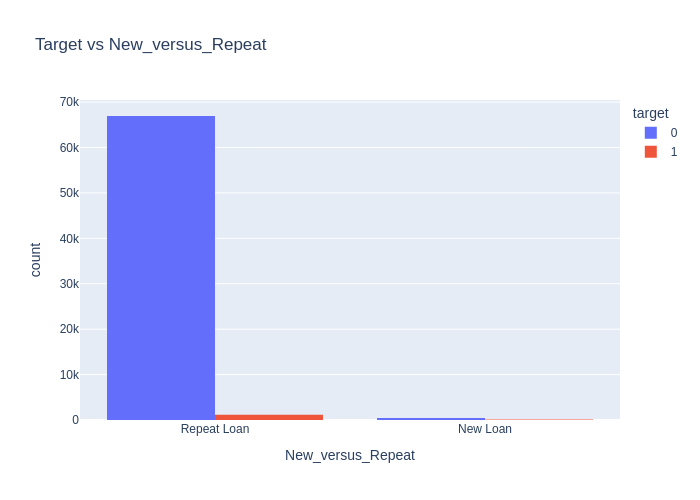

In [35]:
fig_new_repeat = px.histogram(df_train, x='New_versus_Repeat',
                                  color='target',
                                  barmode='group',
                                  title='Target vs New_versus_Repeat')

fig_new_repeat.show()

Looking at the bar plot above, we can see that a customer who has taken a loan before is less likely to default on their loan.

<a id="five"></a>
# 5) Data Cleaning and Preprocessing

During the Exploratory Data Analysis stage we saw some issues that we have to fix before creating some models.

<a href=#cont>Back to Table of Contents</a>

In this section we will be removing the ID, Custormer ID, Country ID and the TBL loan ID columns because they will not be helpful when we start building a model. We will also change the data type of the Lender ID column from float into object, after that we ill change the date columns into ther correct data type and create new columns using those dates. Machine learning models require all input and output variables to be numeric. This means that we wil encoded all the categorical columns  into numbers before we can fit and evaluate a model

In [36]:
# Combining the train and test data for consistent feature engineering
df = pd.concat([df_train, df_test]).reset_index(drop=True)

# Convert the datetime columns appropriately
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])
    # Extract month, day, and year from the date columns
    df[col+'_month'] = df[col].dt.month
    df[col+'_day'] = df[col].dt.day
    df[col+'_year'] = df[col].dt.year
    df[col+'_day_of_year'] = df[col].dt.dayofyear

    # Change the data type of the new columns to object
    df[col+'_month'] = df[col+'_month'].astype(object)
    #df[col+'_weekday'] = df[col+'_weekday'].astype(object)
    df[col+'_year'] = df[col+'_year'].astype(object)

df.drop(columns=date_cols, inplace=True)
df_train['lender_id'] = df_train['lender_id'].astype('object')
df_test['lender_id'] = df_test['lender_id'].astype('object')

# creating new features
df['repayment_ratio'] = df['Total_Amount_to_Repay'] / df['Total_Amount'] # to understand the repayment rate
df['lender_contribution_percentage'] = df['Lender_portion_Funded'] / df['Total_Amount'] # to analyze the portion funded by lenders
df['profitability'] = df['Total_Amount_to_Repay'] - df['Total_Amount'] # to estimate the profit margin for each loan
df['lender_risk'] = df['Lender_portion_to_be_repaid'] / df['Total_Amount_to_Repay'] #to determine the risk exposure of the lender
df['funding_gap'] = df['Total_Amount'] - df['Amount_Funded_By_Lender'] #to understand how much of the loan remains unfunded by the lender
df['lender_recovery_ratio'] = df['Lender_portion_to_be_repaid'] / df['Amount_Funded_By_Lender'] #to estimate the recovery rate for the lender
df['interest_rate'] = (df['Total_Amount_to_Repay'] - df['Total_Amount']) / df['Total_Amount']
df['lender_profit'] = df['Lender_portion_to_be_repaid'] - df['Amount_Funded_By_Lender']
df['average_loan_amount'] = df.groupby('customer_id')['Total_Amount'].transform('mean')
df['lender_total_loans'] = df.groupby('lender_id')['lender_id'].transform('count')
df['lender_total_funding'] = df.groupby('lender_id')['Amount_Funded_By_Lender'].transform('sum')
df['customer_loan_count'] = df.groupby('customer_id')['customer_id'].transform('count') #to count the number of loans a customer has taken


# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with a suitable value (e.g., median)
# You can choose a different strategy based on your data
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Making the data more Gaussian
numerical_features = df.select_dtypes(include=np.number).columns.difference(['ID', 'customer_id', 'country_id','lender_id', 'tbl_loan_id',
                                                                             'target', 'disbursement_date_month', ''])
power = PowerTransformer(method='yeo-johnson')
df[numerical_features] = power.fit_transform(df[numerical_features])

categorical_features = ['lender_id', 'loan_type', 'New_versus_Repeat', 'disbursement_date_month','disbursement_date_year', 'due_date_month', 'due_date_year']
target_column = 'target'

# Function to calculate WoE for a categorical feature
def calculate_woe(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['sum', 'count'])
    grouped.columns = ['num_ones', 'total']
    grouped['num_zeros'] = grouped['total'] - grouped['num_ones']

    # Apply Laplace smoothing to avoid zero counts
    grouped['p1'] = (grouped['num_ones'] + 1) / (grouped['num_ones'].sum() + 1)
    grouped['p0'] = (grouped['num_zeros'] + 1) / (grouped['num_zeros'].sum() + 1)

    # Compute WoE (log-odds transformation)
    grouped['WoE'] = np.log(grouped['p1'] / grouped['p0'])

    return grouped['WoE'].to_dict()

# Apply WoE encoding to multiple categorical features
for feature in categorical_features:
    woe_map = calculate_woe(df, feature, target_column)  # Compute WoE for each feature
    df[feature + "_woe"] = df[feature].map(woe_map)  # Apply mapping
    df.drop(columns=[feature], inplace=True)


#def clean_column_names(df):

  # Get the current column names
  #columns = df.columns

  # Create a list to store cleaned column names
  #cleaned_columns = []

  # Iterate through the columns and clean their names
  #for col in columns:
    # Check for unwanted prefixes and remove them
    #if col.startswith('onehotencoder__'):
      #cleaned_columns.append(col.replace('onehotencoder__', ''))
    #elif col.startswith('remainder__'):
      #cleaned_columns.append(col.replace('remainder__', ''))
    #else:
      #cleaned_columns.append(col)  # Keep original name if no prefix

  # Assign the cleaned column names to the DataFrame
  #df.columns = cleaned_columns

  #return df

#df = clean_column_names(df)

In [37]:
# Exclude the 'ID' column if present and force conversion to float
for col in df.columns:
    if col != 'ID':
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

ID                                 object
customer_id                         int64
country_id                        float64
tbl_loan_id                         int64
Total_Amount                      float64
Total_Amount_to_Repay             float64
duration                          float64
Amount_Funded_By_Lender           float64
Lender_portion_Funded             float64
Lender_portion_to_be_repaid       float64
target                            float64
disbursement_date_day             float64
disbursement_date_day_of_year     float64
due_date_day                      float64
due_date_day_of_year              float64
repayment_ratio                   float64
lender_contribution_percentage    float64
profitability                     float64
lender_risk                       float64
funding_gap                       float64
lender_recovery_ratio             float64
interest_rate                     float64
lender_profit                     float64
average_loan_amount               

In [38]:
# Splitting the data back into train and test
train_df = df[df['ID'].isin(df_train['ID'].unique())]

test_df = df[df['ID'].isin(df_test['ID'].unique())]

train_df = train_df.drop(columns=['ID', 'customer_id', 'country_id', 'tbl_loan_id'])
test_df = test_df.drop(columns=['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'target'])

array([[<Axes: title={'center': 'Total_Amount'}>,
        <Axes: title={'center': 'Total_Amount_to_Repay'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'Amount_Funded_By_Lender'}>,
        <Axes: title={'center': 'Lender_portion_Funded'}>],
       [<Axes: title={'center': 'Lender_portion_to_be_repaid'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'disbursement_date_day'}>,
        <Axes: title={'center': 'disbursement_date_day_of_year'}>,
        <Axes: title={'center': 'due_date_day'}>],
       [<Axes: title={'center': 'due_date_day_of_year'}>,
        <Axes: title={'center': 'repayment_ratio'}>,
        <Axes: title={'center': 'lender_contribution_percentage'}>,
        <Axes: title={'center': 'profitability'}>,
        <Axes: title={'center': 'lender_risk'}>],
       [<Axes: title={'center': 'funding_gap'}>,
        <Axes: title={'center': 'lender_recovery_ratio'}>,
        <Axes: title={'center': 'interest_rate'}>,

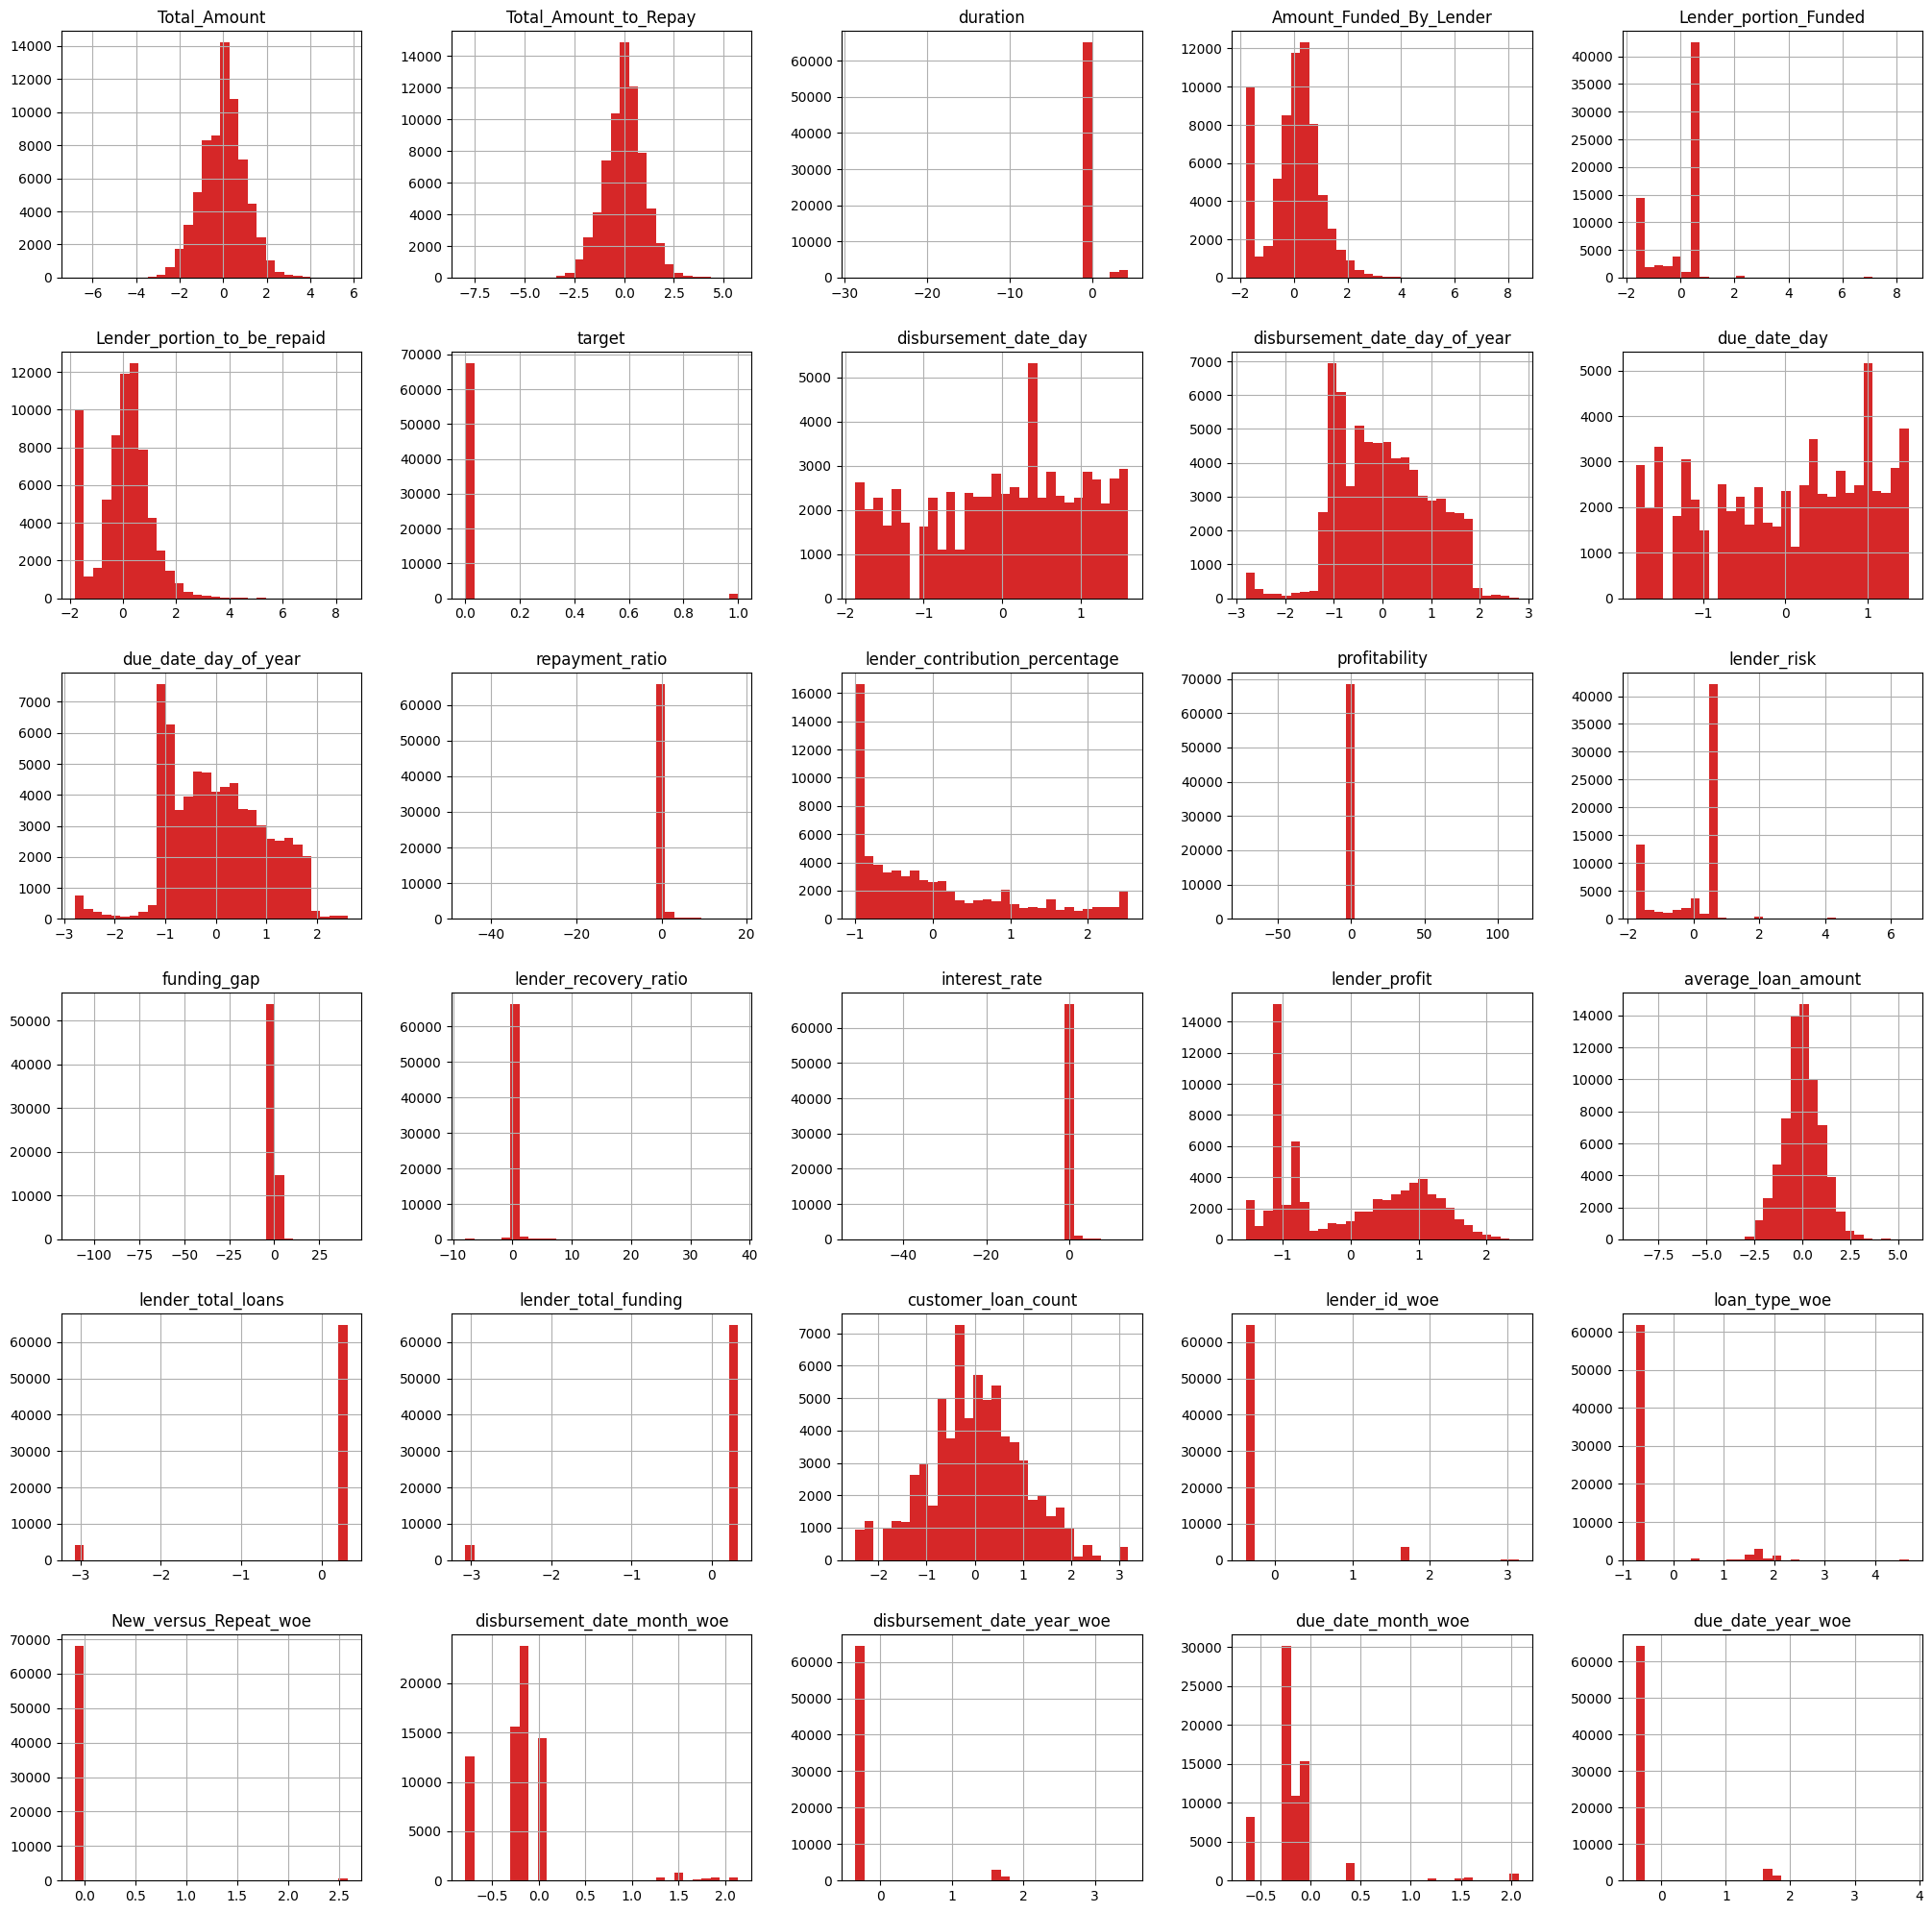

In [39]:
train_df.hist(bins=30, figsize=(25,25), color = 'tab:Red')

During our exploratory data analysis, we saw that numerical columns like **`Total_Amount`** have outliers, but I tried to remove outliers which resulted in the removal of all the rows with loan default. So, we will have to find another way to deal with outliers.

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>

In this section we will train our model that will accurately predict the loan default of a customer. We also saw that the numerical columns are skewed, so we will have to scale them using the Standard scaler. We also have imbalanced data, so we will also tackle that issue.

In [40]:
from sklearn.impute import SimpleImputer

# Split the data into features (X) and target (y)
X = train_df.drop('target', axis=1)
y = train_df['target']

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

#imputer = SimpleImputer(strategy='median')
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)


for col in X_train.select_dtypes(include=np.number).columns:
    median_value = X_train[col].median()
    X_train[col].fillna(median_value, inplace=True)
    X_test[col].fillna(median_value, inplace=True)


# Over sample minority class using SMOTE
smote = SMOTE(random_state=5, sampling_strategy=0.1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Under sample majority class using tomek links
tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_resampled, y_resampled)

X_train_cols = X_final.shape[1]


#X_train = pd.DataFrame(X_final, columns=[f'col_{i}' for i in range(X_train_cols) ])
#X_test = pd.DataFrame(X_test, columns=[f'col_{i}' for i in range(X_test.shape[1])])



# Scale the data
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_final)
X_test_scaled = scaler.transform(X_test)


# Making the data more Gaussian
#power = PowerTransformer(method='yeo-johnson')
#X_train_transformed = power.fit_transform(X_train_scaled)
#X_test_transformed = power.transform(X_test_scaled)

In [41]:
def forward_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    while initial_features:
        remaining_features = list(set(initial_features) - set(best_features))
        p_values = []
        for new_column in remaining_features:
            model = LinearRegression().fit(X[best_features + [new_column]], y)
            p_values.append(f_regression(X[best_features + [new_column]], y)[1][-1])

        # Check if p_values is empty before calling min
        if not p_values:
            break # Exit the loop if no p-values were calculated

        min_p_value = min(p_values)
        if min_p_value < 0.05:
           best_features.append(remaining_features[np.argmin(p_values)])
        else:
            break

    return best_features

selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

Selected features: ['lender_total_loans', 'duration', 'interest_rate', 'repayment_ratio', 'due_date_month_woe', 'loan_type_woe', 'lender_profit', 'disbursement_date_month_woe', 'disbursement_date_year_woe', 'due_date_year_woe', 'lender_id_woe', 'lender_recovery_ratio', 'customer_loan_count', 'lender_total_funding', 'New_versus_Repeat_woe', 'Lender_portion_to_be_repaid', 'profitability', 'funding_gap', 'Total_Amount_to_Repay', 'Amount_Funded_By_Lender', 'Total_Amount', 'average_loan_amount', 'due_date_day_of_year', 'Lender_portion_Funded', 'disbursement_date_day_of_year', 'lender_risk', 'disbursement_date_day', 'lender_contribution_percentage']


Next, we will train multiple models and compare their performances, and from there we will choose the best-performing model as the model we will use to make predictions.

In [42]:
def train_models_with_stratified_kfold(models, X, y, n_splits=5, scoring='f1', random_state=None):

    # Initialize Stratified K-Fold
    skf = RepeatedStratifiedKFold(n_splits=n_splits, random_state=random_state)

    # Dictionary to store results
    results = {}

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        # Perform cross-validation
        scores = cross_val_score(model, X, y, cv=skf, scoring=scoring, n_jobs=1)
        results[model_name] = scores
        print(f"{model_name}: Mean {scoring} = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

    return results

In [43]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=5),
    'Ridge Classifier': RidgeClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Perceptron': Perceptron(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(random_state=5),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=5),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=None, random_state=5),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=5),
    'Extreme Gradient Boosting Classifier': xgb.XGBClassifier(learning_rate=0.1, max_depth=10, min_child_samples=20, n_estimators=300, num_leaves=40, random_state=5),
    'Histogram Gradient Boosting Classifier': HistGradientBoostingClassifier(random_state=5),
    'LightGBM Classifier': LGBMClassifier(learning_rate=0.1, max_depth=10, min_child_samples=20, n_estimators=300, num_leaves=40, random_state=5),
    'Bagging Classifier': BaggingClassifier(random_state=5),
    'CatBoost Classifier': CatBoostClassifier(random_state=5),
    'Calibrated Classifier CV': CalibratedClassifierCV(),
}

# Train models with Stratified K-Fold
results = train_models_with_stratified_kfold(models, X_train_scaled, y_final, n_splits=5, scoring='f1', random_state=5)

# Print results
for model_name, scores in results.items():
    print(f"{model_name}: {scores}")

Streaming output truncated to the last 5000 lines.
160:	learn: 0.0172816	total: 9.62s	remaining: 50.1s
161:	learn: 0.0172143	total: 9.72s	remaining: 50.3s
162:	learn: 0.0171455	total: 9.83s	remaining: 50.5s
163:	learn: 0.0170217	total: 9.9s	remaining: 50.5s
164:	learn: 0.0169619	total: 9.98s	remaining: 50.5s
165:	learn: 0.0169294	total: 10s	remaining: 50.3s
166:	learn: 0.0169077	total: 10s	remaining: 50.1s
167:	learn: 0.0168597	total: 10.1s	remaining: 49.8s
168:	learn: 0.0168310	total: 10.1s	remaining: 49.6s
169:	learn: 0.0167804	total: 10.1s	remaining: 49.3s
170:	learn: 0.0167617	total: 10.1s	remaining: 49.1s
171:	learn: 0.0167045	total: 10.1s	remaining: 48.8s
172:	learn: 0.0166773	total: 10.2s	remaining: 48.6s
173:	learn: 0.0166195	total: 10.2s	remaining: 48.4s
174:	learn: 0.0165721	total: 10.2s	remaining: 48.2s
175:	learn: 0.0165354	total: 10.2s	remaining: 47.9s
176:	learn: 0.0164514	total: 10.3s	remaining: 47.7s
177:	learn: 0.0163739	total: 10.3s	remaining: 47.5s
178:	learn: 0.0163

After seeing how the models have performed on training dataset, we will now look at how they perform on test dataset.

In [44]:
# Dictionary to store test results
test_results = {}

# Loop through each model, train it on the full training data, and evaluate on test data
for model_name, model in models.items():
    # Train the model on the full training set
    model.fit(X_train_scaled, y_final)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate performance
    f1 = f1_score(y_test, y_pred)  # Adjust scoring metric if needed
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    test_results[model_name] = {'F1 Score': f1, 'Accuracy': accuracy}

    # Print classification report for each model
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Print summarized results
for model, metrics in test_results.items():
    print(f"{model}: F1 Score = {metrics['F1 Score']:.4f}, Accuracy = {metrics['Accuracy']:.4f}")

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13479
         1.0       0.60      0.81      0.69       252

    accuracy                           0.99     13731
   macro avg       0.80      0.90      0.84     13731
weighted avg       0.99      0.99      0.99     13731

--------------------------------------------------
Model: Ridge Classifier
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     13479
         1.0       0.56      0.64      0.60       252

    accuracy                           0.98     13731
   macro avg       0.78      0.81      0.79     13731
weighted avg       0.99      0.98      0.98     13731

--------------------------------------------------
Model: SGD Classifier
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13479
         1.0       0.55      0.78      0.64       252

    acc

In [48]:
compare = pd.DataFrame({'Model': list(models.keys()),
                        'mean f1': [metrics['F1 Score'] for metrics in test_results.values()]
                        })
compare.sort_values(by='mean f1', ascending=False)

,Model,mean f1
11,Extreme Gradient Boosting Classifier,0.901010
15,CatBoost Classifier,0.900000
13,LightGBM Classifier,0.900000
14,Bagging Classifier,0.891892
8,Random Forest Classifier,0.885880
12,Histogram Gradient Boosting Classifier,0.877589
9,Extra Trees Classifier,0.851562
10,Gradient Boosting Classifier,0.820144
6,KNeighbors Classifier,0.732297
7,Support Vector Classifier,0.719328


Looking at the mean f1 scores of all the models we trained, Extreme Gradient Boosting was the top performing model on the test data. Therefore, we will choose Extreme Gradient Boosting to make predictions on the leaderboard test data.

In [49]:
# Set up an Extreme Gradient Boosting Classifier model
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, min_child_samples=20, n_estimators=300, num_leaves=40, random_state=5)


# Initialize stratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

# Perform cross-validation and calculate f1 score
scores = cross_val_score(xgb_model, X_train_scaled, y_final, cv=cv, scoring='f1')


xgb_model.fit(X_train_scaled, y_final)

print('F1 Score:' , scores)
print('Mean F1 score:', scores.mean())

F1 Score: [0.98526703 0.9787627  0.987061   0.97407407 0.98518519 0.98351648
 0.97678737 0.98148148 0.98068077 0.97798165]
Mean F1 score: 0.9810797750089592


Next, lets look at feature importance to see which features which contribute more to the model's prediction.

<Axes: ylabel='feature_names'>

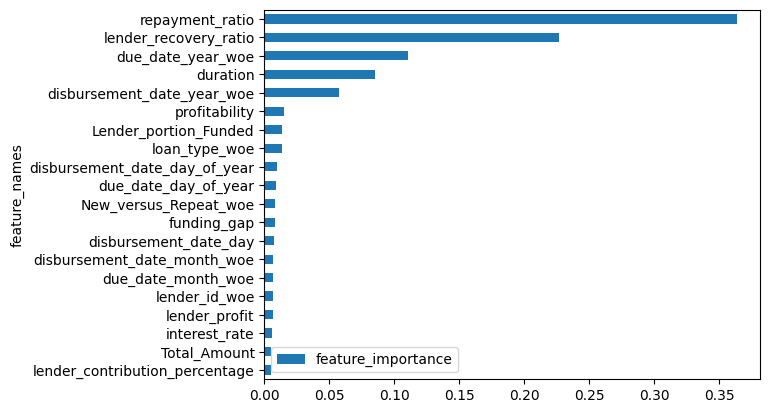

In [51]:
feature_importances = xgb_model.feature_importances_
importance = pd.DataFrame({'feature_importance': feature_importances,
              'feature_names': X_train.columns}).sort_values(by=['feature_importance'],
                                                       ascending=False)


importance[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

In [52]:
# Ensure unseen data has the same columns as training data
X_train_cols = X_train.columns
test_prepared = test_df[X_train_cols].astype('float')

# Replace infinities with NaN
test_prepared = test_prepared.replace([np.inf, -np.inf], np.nan)

# Fill NaNs using the precomputed medians from X_train
for col in test_prepared.select_dtypes(include=np.number).columns:
    test_prepared[col] = test_prepared[col].fillna(X_train[col].median())  # Use X_train median

# Apply the same PowerTransformer fitted on X_train
#test_transformed = power.transform(test_prepared)

# Apply the same RobustScaler fitted on X_train
test_scaled = scaler.transform(test_prepared)

# Make predictions
test_predictions = xgb_model.predict(test_scaled)
print(test_predictions[:6])

[0 0 0 0 0 0]


In [53]:
# Create a DataFrame df_submission with two columns "ID" and "Target"
df_submission = pd.DataFrame({"ID": df_test["ID"], "target": test_predictions})
print(df_submission.head())

                      ID  target
0  ID_269404226088267278       0
1  ID_255356300042267278       0
2  ID_257026243764267278       0
3  ID_264617299409267278       0
4  ID_247613296713267278       0


In [54]:
df_submission.tail()

,ID,target
18589,ID_297596365331297183,0
18590,ID_259715231897267278,0
18591,ID_296701364008297183,0
18592,ID_268271242864267278,0
18593,ID_248929241821267278,0


In [ ]:
df_submission.to_csv("submission.csv", index=False)